<a href="https://colab.research.google.com/github/aditibadkur/aeravat_gg/blob/ml/TeleComPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD,Adam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
df.isnull().sum()*100/df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [ ]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

In [ ]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

<ipython-input-18-0fd943ee7019>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")


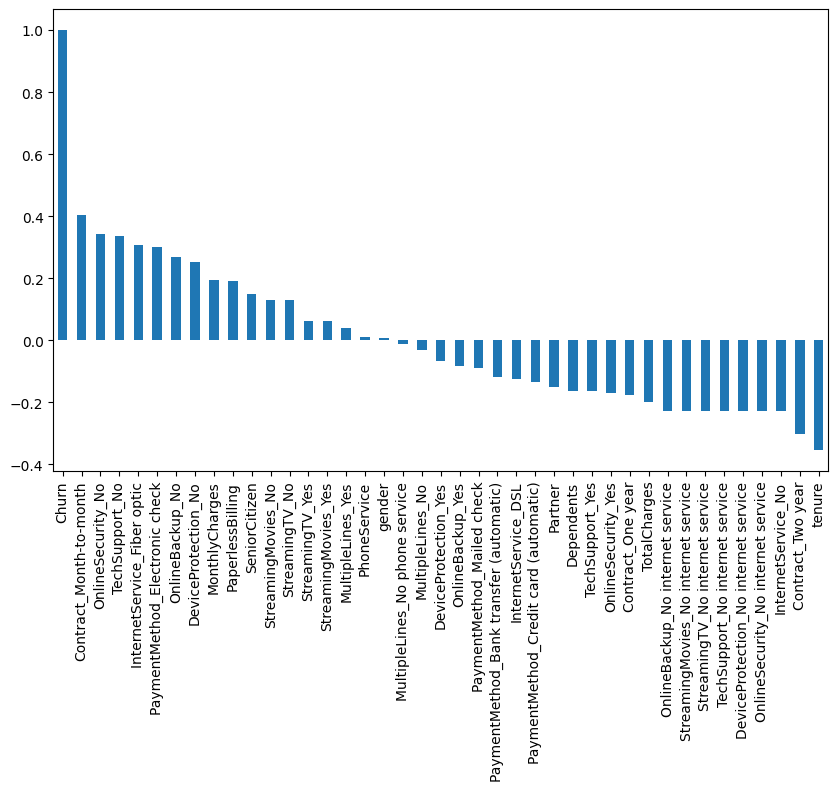

In [ ]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

In [ ]:
X = df.drop(columns = ["Churn","customerID"])
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 40), (2110, 40), (4922,), (2110,))

In [ ]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [ ]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4499,0.154930,0.597512,0.102752,1,0,0,1,1,1,0,...,1,0,0,1,0,0,0,0,1,0
1933,0.267606,0.014428,0.045823,0,0,0,0,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4668,0.014085,0.427363,0.012364,1,0,0,1,1,1,1,...,0,0,1,1,0,0,0,1,0,0
5681,0.464789,0.457214,0.240884,1,1,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
3610,0.154930,0.814925,0.132183,1,0,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,0


In [ ]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [ ]:
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      27.89
1      42.25
2      51.05
3      56.09
4      60.26
5      63.72
6      67.05
7      70.28
8      73.43
9      76.43
10     79.31
11     82.13
12     84.65
13     87.13
14     89.42
15     91.69
16     93.80
17     95.80
18     97.74
19     98.95
20     99.85
21    100.00
22    100.00
23    100.00
24    100.00
25    100.00
26    100.00
27    100.00
28    100.00
29    100.00
30    100.00
31    100.00
32    100.00
33    100.00
34    100.00
35    100.00
36    100.00
37    100.00
38    100.00
39    100.00
dtype: float64


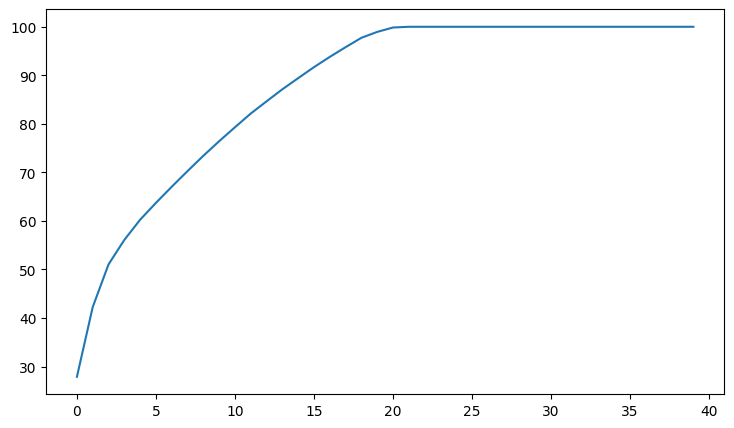

In [ ]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [ ]:
# create pipeline
PCA_VARS = 20
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [ ]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.749288906948395

In [ ]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

[[1099  450]
 [ 122  439]]
Sensitivity: 	0.78
Specificity: 	0.71


In [ ]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.734254
1    0.265746
Name: Churn, dtype: float64

In [ ]:
pca = PCA()
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [20, 30], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 5)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [20, 30]},
             scoring='roc_auc', verbose=1)

In [ ]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087507,0.006684,0.008408,0.001726,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.839262,0.839241,0.825504,0.831737,0.858133,0.849469,0.852925,0.842324,0.010871,9
1,0.108209,0.005489,0.010360,0.006391,0.1,l2,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.842903,0.842412,0.826695,0.835365,0.863533,0.850723,0.854974,0.845229,0.011429,8
2,0.082280,0.006930,0.007816,0.000395,0.5,l2,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.839293,0.839365,0.825514,0.831447,0.857760,0.849324,0.852603,0.842187,0.010768,10
3,0.115177,0.012034,0.008271,0.000435,0.5,l2,30,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.844547,0.844329,0.826695,0.838836,0.864963,0.851459,0.855140,0.846567,0.011336,7
4,0.074125,0.006105,0.007846,0.000444,1,l2,20,"{'logistic__C': 1, 'logistic__penalty': 'l2', ...",0.839334,0.839365,0.825638,0.831395,0.857605,0.849210,0.852644,0.842170,0.010709,11
5,0.126183,0.007827,0.007782,0.000495,1,l2,30,"{'logistic__C': 1, 'logistic__penalty': 'l2', ...",0.845023,0.844391,0.826208,0.839520,0.865450,0.851573,0.855203,0.846767,0.011509,6
6,0.080954,0.006278,0.007763,0.000338,2,l2,20,"{'logistic__C': 2, 'logistic__penalty': 'l2', ...",0.839293,0.839375,0.825545,0.831395,0.857605,0.849179,0.852582,0.842139,0.010719,15
7,0.113503,0.007421,0.007912,0.000410,2,l2,30,"{'logistic__C': 2, 'logistic__penalty': 'l2', ...",0.845054,0.844505,0.826063,0.840204,0.865885,0.851770,0.855130,0.846945,0.011588,5
8,0.071510,0.008101,0.007801,0.000314,3,l2,20,"{'logistic__C': 3, 'logistic__penalty': 'l2', ...",0.839262,0.839417,0.825545,0.831426,0.857574,0.849190,0.852561,0.842139,0.010706,16
9,0.116327,0.012599,0.008525,0.001528,3,l2,30,"{'logistic__C': 3, 'logistic__penalty': 'l2', ...",0.845344,0.844433,0.826125,0.840453,0.866082,0.851905,0.855213,0.847079,0.011610,4


In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8472984137559807
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 30}


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[729 820]
 [ 30 531]]
Sensitivity: 	0.95
Specificity: 	0.47
AUC:    	 0.84


In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8283678819179352
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

[[1393  156]
 [ 306  255]]
Sensitivity: 	0.45
Specificity: 	0.9


we need to focus on high sensitivity(true positive) hence we don't use random forest since it gives very low sensitivity.


In [ ]:
X_train.shape

(4922, 40)

In [ ]:
model=Sequential([Dense(32, input_shape = (40,), activation='relu'),
                  Dense(16,input_shape = (36,), activation='relu'),
                  Dense(1,activation="sigmoid")] # For the final layer, keep the activation as sigmoid
)

In [ ]:
model.compile(Adam(learning_rate=0.1),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=20,epochs=50,shuffle=True, verbose=2)

Epoch 1/50
247/247 - 2s - loss: 0.4687 - accuracy: 0.7710 - 2s/epoch - 7ms/step
Epoch 2/50
247/247 - 1s - loss: 0.4469 - accuracy: 0.7783 - 593ms/epoch - 2ms/step
Epoch 3/50
247/247 - 1s - loss: 0.4453 - accuracy: 0.7873 - 718ms/epoch - 3ms/step
Epoch 4/50
247/247 - 1s - loss: 0.4437 - accuracy: 0.7920 - 725ms/epoch - 3ms/step
Epoch 5/50
247/247 - 1s - loss: 0.4431 - accuracy: 0.7875 - 518ms/epoch - 2ms/step
Epoch 6/50
247/247 - 1s - loss: 0.4363 - accuracy: 0.7954 - 600ms/epoch - 2ms/step
Epoch 7/50
247/247 - 1s - loss: 0.4390 - accuracy: 0.7974 - 683ms/epoch - 3ms/step
Epoch 8/50
247/247 - 1s - loss: 0.4372 - accuracy: 0.7936 - 699ms/epoch - 3ms/step
Epoch 9/50
247/247 - 1s - loss: 0.4394 - accuracy: 0.7895 - 682ms/epoch - 3ms/step
Epoch 10/50
247/247 - 1s - loss: 0.4517 - accuracy: 0.7848 - 622ms/epoch - 3ms/step
Epoch 11/50
247/247 - 1s - loss: 0.4472 - accuracy: 0.7871 - 584ms/epoch - 2ms/step
Epoch 12/50
247/247 - 0s - loss: 0.4527 - accuracy: 0.7727 - 414ms/epoch - 2ms/step
Epoc

In [ ]:
#use model.predict to predict the survival rate on the test dataset and print the predictions
predictions = model.predict(X_test,batch_size=10,verbose=2)
predictions

211/211 - 0s - 353ms/epoch - 2ms/step


array([[0.38248554],
       [0.20730816],
       [0.01538628],
       ...,
       [0.6853822 ],
       [0.00411522],
       [0.68538225]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
binary_predictions = (predictions > 0.2).astype(int)
accuracy = accuracy_score(y_test, binary_predictions)
accuracy

0.657345971563981

In [ ]:
print("AUC:    \t", round(roc_auc_score(y_test, predictions),2))

AUC:    	 0.82


In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, binary_predictions)

# Calculate sensitivity and specificity
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]
false_positives = cm[0, 1]

sensitivity = true_positives / (true_positives + false_negatives + tf.keras.backend.epsilon())
specificity = true_negatives / (true_negatives + false_positives + tf.keras.backend.epsilon())

print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

Sensitivity: 0.88
Specificity: 0.58


In [ ]:
!pip install git+https://github.com/thuijskens/scikit-hyperband.git

  Cloning https://github.com/thuijskens/scikit-hyperband.git to /tmp/pip-req-build-x9nhafbe
  Running command git clone --filter=blob:none --quiet https://github.com/thuijskens/scikit-hyperband.git /tmp/pip-req-build-x9nhafbe
  Resolved https://github.com/thuijskens/scikit-hyperband.git to commit 68bef5a20570e802b2d9e9be405c3f2a043a32cd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.3 MB/s eta 0:00:00
  Created wheel for scikit-hyperband: filename=scikit_hyperband-0.0.1-py3-none-any.whl size=10342 sha256=f01ce46d2602cb4e078daa1791d77c0c37b76411b09ec4885595189dd1f0e7fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-17lopihp/wheels/11/19/4d/c6ca669f2a8f6caaf990cfb3bb66ef9d10f25d1cdaa493e4f2
Successfully built scikit-hyperband


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'reg_lambda': [0.0, 0.1, 0.5, 1.0]
}

In [61]:
clf = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and corresponding ROC AUC
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best hyperparameters:", best_params)
print("Best ROC AUC:", best_score)

# Optionally, you can retrain the final model with the best hyperparameters on the full dataset
best_clf = XGBClassifier(**best_params)
best_clf.fit(X_train, y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.1, 'subsample': 0.6}
Best ROC AUC: 0.8513400074728292
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.1, 'subsample': 0.6}
Best ROC AUC: 0.8513400074728292


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=best_clf.predict(X_test)

In [ ]:
X_test["churn_prediction"] = y_pred

In [ ]:
X_test

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn_prediction
4221,0.000000,0.010448,0.000058,0,0,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,0
1820,0.070423,0.272637,0.035155,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2375,0.985915,0.909950,0.909930,1,1,1,0,1,1,1,...,0,1,0,0,1,1,0,0,0,0
5462,0.887324,0.516418,0.514874,0,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
1791,0.605634,0.430348,0.311955,1,0,1,0,1,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,0.633803,0.901990,0.557985,1,0,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
4768,0.985915,0.015423,0.158049,0,1,1,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6150,0.436620,0.724378,0.329183,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0
3234,0.323944,0.014428,0.050052,1,0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [62]:
X_test.to_csv('churn_prediction')

In [ ]:
import pickle

In [ ]:
pickle.dump(best_clf, open("XgBoost_telecom.pkl", "wb"))

In [ ]:
loaded_model = pickle.load(open("XgBoost_telecom.pkl", "rb"))

In [ ]:
with open("XgBoost_telecom.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.2 MB/s eta 0:00:00


In [ ]:
import shap
# Get SHAP values
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_train)

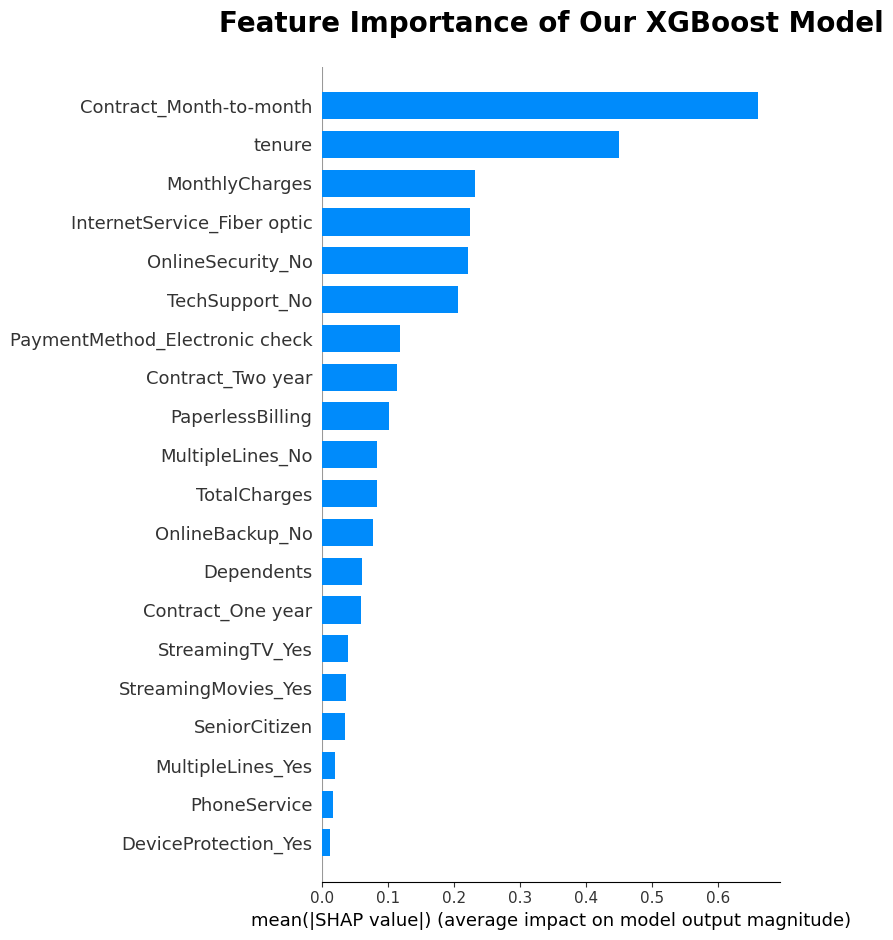

In [ ]:
plt.figure()
plt.title('Feature Importance of Our XGBoost Model', pad=25, fontsize=20, fontweight='bold')
shap.summary_plot(shap_values, X, plot_type="bar")

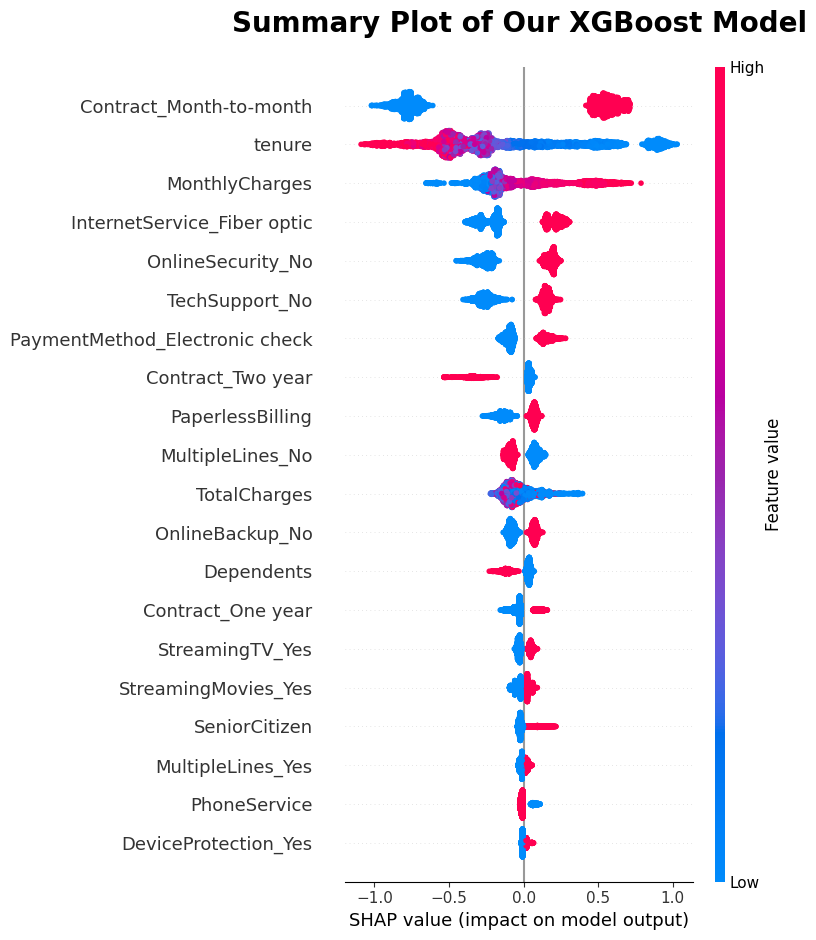

In [ ]:
plt.figure()
plt.title('Summary Plot of Our XGBoost Model', pad=25, fontsize=20, fontweight='bold')
shap.summary_plot(shap_values, X_train)

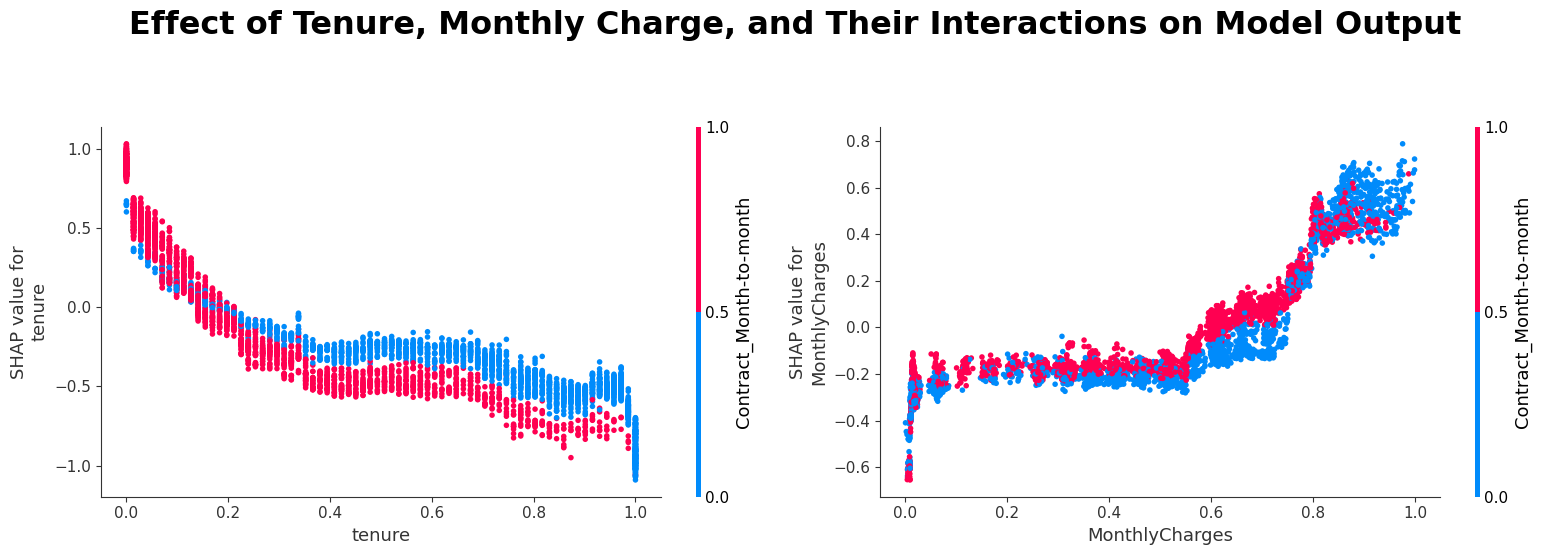

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5), sharex=False, sharey=False)
fig.suptitle('Effect of Tenure, Monthly Charge, and Their Interactions on Model Output',
             y=1.1, fontsize=23, fontweight='bold')

# Create graph showing effect of 'tenure' on model output
tenure_dependencePlot = shap.dependence_plot('tenure', shap_values, X_train,
                                             ax=axes[0], show=False)

# Create graph showing effect of 'MonthlyCharges' on model output
monthlyCharges_dependencePlot = shap.dependence_plot('MonthlyCharges', shap_values, X_train,
                                                     ax=axes[1], show=False)

plt.tight_layout()